# ML Project : Predicting Movie Revue
Made by:

Corentin Maillard 21306

Mourad Mettioui 195019

## A) Data Understanding and analysis

### 1) Load the Dataset and libraries

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_file_path = 'dataset.csv'
dataset_supplement_file_path = 'dataset_supplement.csv'
# transform the first collum into an index
dataset_data = pd.read_csv(dataset_file_path, index_col=0)
dataset_supplement_data = pd.read_csv(dataset_supplement_file_path, index_col=0) 


### 2) Undersand the structure of the dataset

In [93]:
# examine the contents of the resultant Dataset using the head() command, which grabs the first five rows:
dataset_data.head()

,vote_count,vote_average,title,tagline,status,spoken_languages,duration,revenue,release,countries_of_production,production,popularity,overview,original_title,original_language,keywords,id,homepage,genres,financial_investment
0,11800,7.2,Avatar,Enter the World of Pandora.,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",162.0,2.787965e+09,2009-12-10,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",150.437577,"In the 22nd century, a paraplegic Marine is di...",Avatar,en,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",19995,http://www.avatarmovie.com/,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000.0
1,4500,6.9,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",169.0,9.610000e+08,2007-05-19,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",139.082615,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,en,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",285,http://disney.go.com/disneypictures/pirates/,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000.0
2,4466,6.3,Spectre,A Plan No One Escapes,Released,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",148.0,8.806746e+08,2015-10-26,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",107.376788,A cryptic message from Bond’s past sends him o...,Spectre,en,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",206647,http://www.sonypictures.com/movies/spectre/,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000.0
3,9106,7.6,The Dark Knight Rises,The Legend Ends,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",165.0,1.084939e+09,2012-07-16,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",112.312950,Following the death of District Attorney Harve...,The Dark Knight Rises,en,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",49026,http://www.thedarkknightrises.com/,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",250000000.0
4,2124,6.1,John Carter,"Lost in our world, found in another.",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",132.0,2.841391e+08,2012-03-07,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",43.926995,"John Carter is a war-weary, former military ca...",John Carter,en,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",49529,http://movies.disney.com/john-carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",260000000.0


We can see the different features which are:
- vote count
- vote average
- title
- tagline
- status
- spoken languages
- duration
- release
- countries_of_production
- production
- popularity
- overview
- original_title
- original_language
- keywords
- id
- homepage
- genres
- financial_investment

And we have the target : 
- revenue

In [94]:
# we are going to see if all the data that we have are complete
dataset_data.info()
# we can also use the isnull().sum() to see directly how many data are missing
dataset_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote_count               4803 non-null   int64  
 1   vote_average             4323 non-null   float64
 2   title                    4803 non-null   object 
 3   tagline                  3959 non-null   object 
 4   status                   4803 non-null   object 
 5   spoken_languages         4803 non-null   object 
 6   duration                 4801 non-null   float64
 7   revenue                  4755 non-null   float64
 8   release                  4802 non-null   object 
 9   countries_of_production  4803 non-null   object 
 10  production               4803 non-null   object 
 11  popularity               4803 non-null   float64
 12  overview                 4800 non-null   object 
 13  original_title           4803 non-null   object 
 14  original_language        4563

vote_count                    0
vote_average                480
title                         0
tagline                     844
status                        0
spoken_languages              0
duration                      2
revenue                      48
release                       1
countries_of_production       0
production                    0
popularity                    0
overview                      3
original_title                0
original_language           240
keywords                      0
id                            0
homepage                   3091
genres                        0
financial_investment        384
dtype: int64

We can see that they are only 1712 non-null homepage on 4803 entires, so we will discard this feature because they are too many missing datas.

For the other features, we can see if they are complete or not

In [95]:
# we are going to see if all the data are different or not
dataset_data.nunique()

vote_count                 1609
vote_average                 70
title                      4800
tagline                    3944
status                        3
spoken_languages            544
duration                    156
revenue                    3268
release                    3280
countries_of_production     469
production                 3697
popularity                 4802
overview                   4800
original_title             4801
original_language            37
keywords                   4222
id                         4803
homepage                   1691
genres                     1175
financial_investment        412
dtype: int64

In [96]:
# we will drop the id because it is not an information that will ever be seen by the custommer.
# So we can assume that it is not an important feature for our model.
dataset_data.drop(columns=['id'], inplace=True)
dataset_data.drop(columns=['homepage'], inplace=True)
dataset_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote_count               4803 non-null   int64  
 1   vote_average             4323 non-null   float64
 2   title                    4803 non-null   object 
 3   tagline                  3959 non-null   object 
 4   status                   4803 non-null   object 
 5   spoken_languages         4803 non-null   object 
 6   duration                 4801 non-null   float64
 7   revenue                  4755 non-null   float64
 8   release                  4802 non-null   object 
 9   countries_of_production  4803 non-null   object 
 10  production               4803 non-null   object 
 11  popularity               4803 non-null   float64
 12  overview                 4800 non-null   object 
 13  original_title           4803 non-null   object 
 14  original_language        4563

### 3) Perform Exploratory Data Analysis (EDA)

In [97]:
dataset_data.describe()

,vote_count,vote_average,duration,revenue,popularity,financial_investment
count,4803.000000,4323.000000,4801.000000,4.755000e+03,4803.000000,4.419000e+03
mean,690.217989,6.090354,106.875859,8.231486e+07,21.492301,2.898466e+07
std,1234.585891,1.193315,22.611935,1.630872e+08,31.816650,4.065526e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,54.000000,5.600000,94.000000,0.000000e+00,4.668070,7.500000e+05
50%,235.000000,6.200000,103.000000,1.918402e+07,12.921594,1.480000e+07
75%,737.000000,6.800000,118.000000,9.311911e+07,28.313505,4.000000e+07
max,13752.000000,10.000000,338.000000,2.787965e+09,875.581305,3.800000e+08


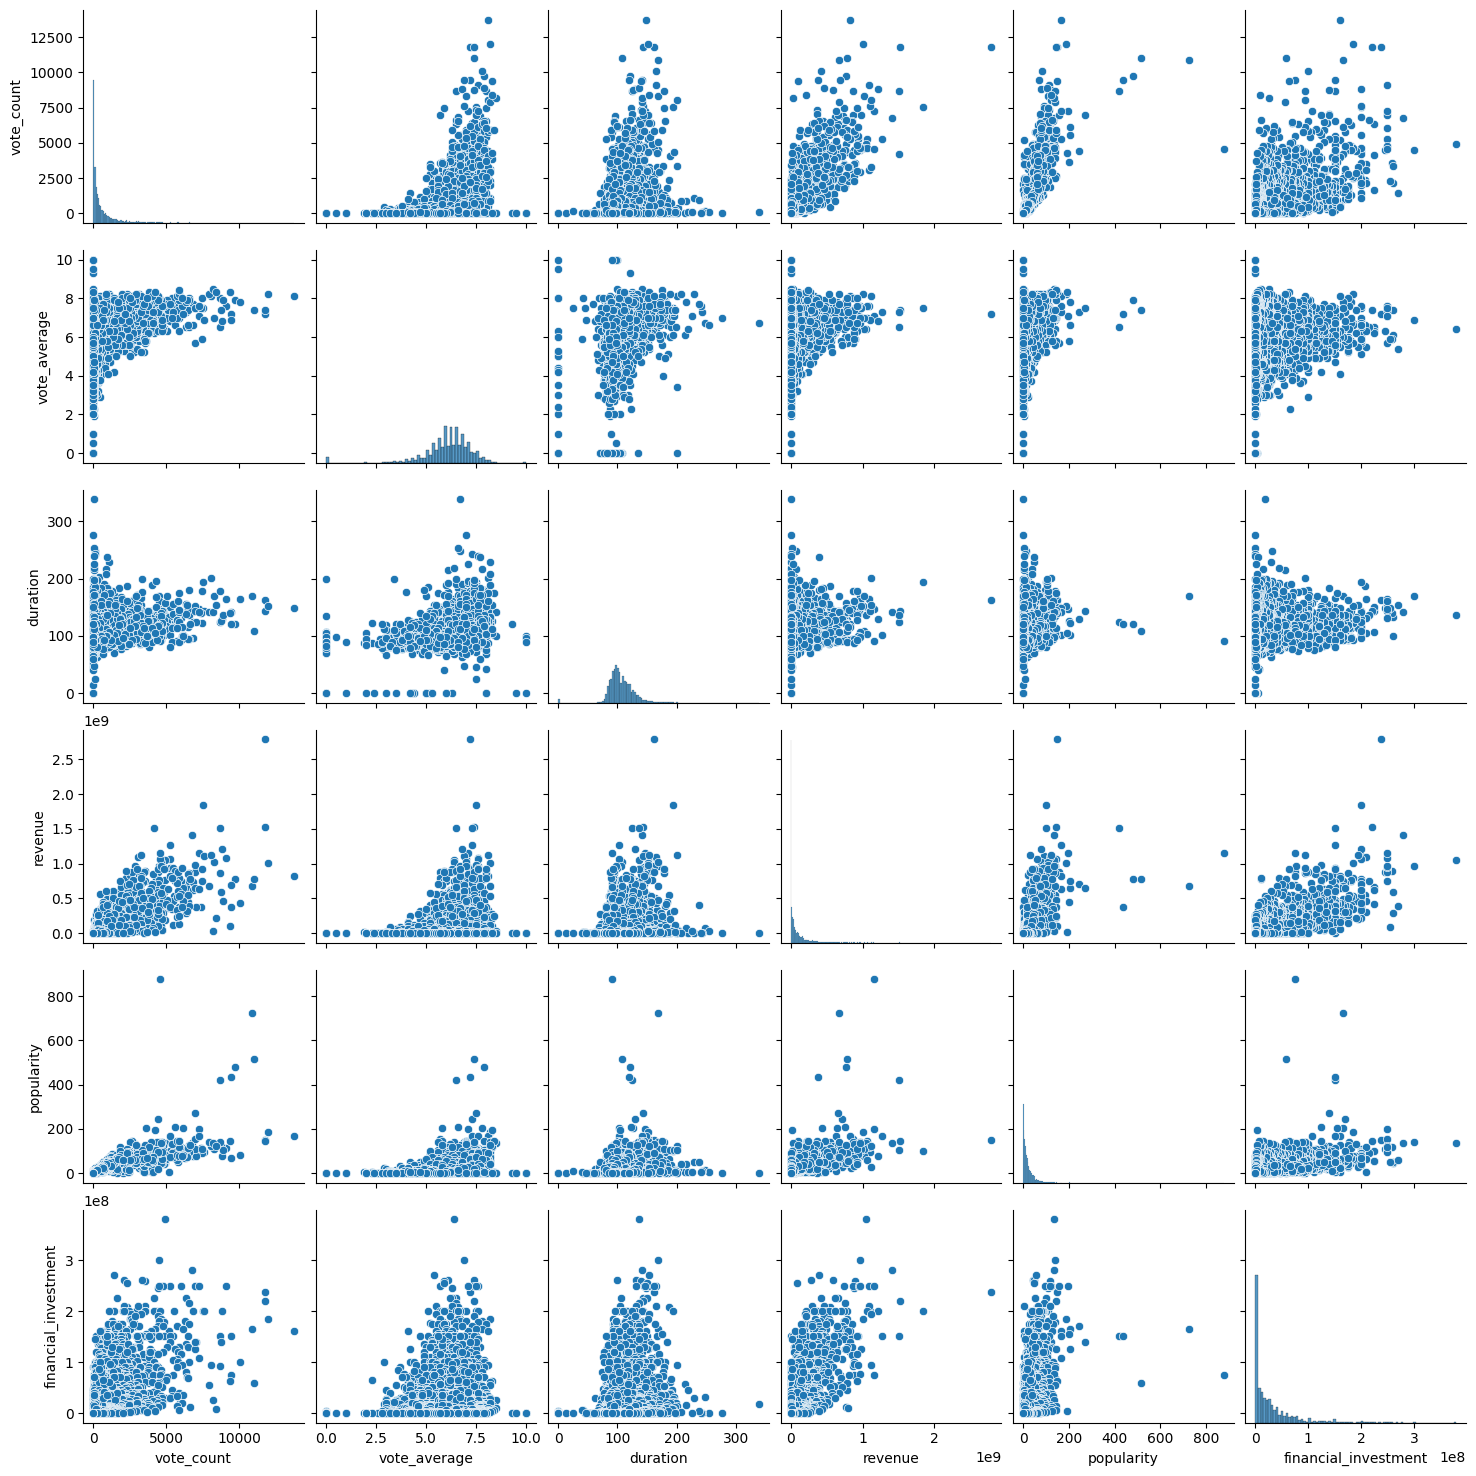

In [98]:
sns.pairplot(dataset_data)  # Visualize pairwise relationships using a pairplot
plt.show()

We can see that that the revenue will be affected by:
- the financial investment
- the vote count

For the other features (vote average, duration, popularity), it is not really visible the impact they have an the revenue

We can see that the vote average is affected by:
- the vote count
- the financial investment

We can see a big problem, that is the feature that are not number cannot be used to make an EDA with the way I make it.

We will use the one hot encoding approach that generally perform best on:
- the country_of_production
- the spoken_languages
- genres
- status
- original_language

For the feature like the title, tagline, overview, original_title we know that they can have an influence on the renenue but they are to complexe to exploit so we will discard them

In [99]:
dataset_data.drop(columns=['title'], inplace=True)
dataset_data.drop(columns=['tagline'], inplace=True)
dataset_data.drop(columns=['overview'], inplace=True)
dataset_data.drop(columns=['original_title'], inplace=True)

dataset_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 0 to 4802
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote_count               4803 non-null   int64  
 1   vote_average             4323 non-null   float64
 2   status                   4803 non-null   object 
 3   spoken_languages         4803 non-null   object 
 4   duration                 4801 non-null   float64
 5   revenue                  4755 non-null   float64
 6   release                  4802 non-null   object 
 7   countries_of_production  4803 non-null   object 
 8   production               4803 non-null   object 
 9   popularity               4803 non-null   float64
 10  original_language        4563 non-null   object 
 11  keywords                 4803 non-null   object 
 12  genres                   4803 non-null   object 
 13  financial_investment     4419 non-null   float64
dtypes: float64(5), int64(1), obje

In [105]:
dataset_data['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [106]:

dataset_data['genres'][1]

'[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'

In [107]:
dataset_data['genres'][20]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}]'